# Pattern Variant
PatternVariant is a simple class that represents a pattern that can be drawn on the grid.

It takes a minimum of 2 arguments, and a maximum of 3. The first two are the starting direction and the pattern signature. The last, optional, one is to make it a great spell to hide hide the draw order.


## Imports
For this example, [palettes](Palettes.ipynb) will be used for the colors.

In [1]:
from hex_renderer_py import GridOptions, GridPatternOptions, Point, Lines, Intersections, PatternVariant, HexGrid
from IPython.display import display, Image
from IPython.utils import io
with io.capture_output() as captured:
    %run Palettes.ipynb

## Base Example
This example is a basic hex that will summon block on the block you are looking at. It will be used throughout the examples to show how different settings affect how it is drawn.

In [2]:
example_patterns = [
    PatternVariant("NORTH_EAST", "qaq"),   #Mind's reflection
    PatternVariant("EAST", "aa"),          #Compass Purification
    PatternVariant("NORTH_EAST", "qaq"),   #Mind's reflection
    PatternVariant("EAST", "wa"),          #Alidade's Purification
    PatternVariant("EAST", "wqaawdd"),     #Architects Distillation
    PatternVariant("NORTH_EAST", "qaq"),   #Mind's reflection
    PatternVariant("EAST", "aa"),          #Compass Purification
    PatternVariant("NORTH_EAST", "qaq"),   #Alidade's Purification
    PatternVariant("EAST", "wa"),          #Mind's Reflection
    PatternVariant("EAST", "weddwaa"),     #Archers Distillation
    PatternVariant("NORTH_EAST", "waaw"),  #Add
    PatternVariant("NORTH_EAST", "qqd"),   #Summon Light
]

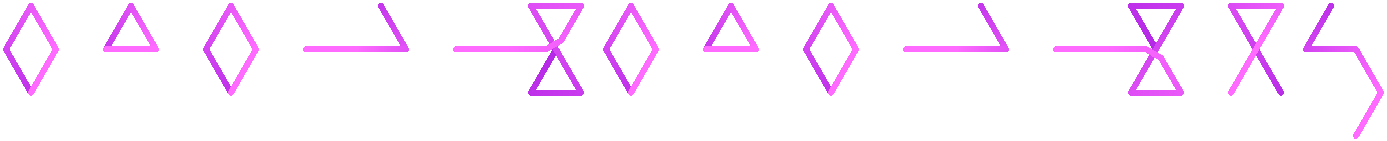

In [3]:
gradient = GridOptions(
    line_thickness=0.12,
    center_dot=Point.None_(),
    pattern_options=GridPatternOptions.Uniform(
        intersections=Intersections.Nothing(),
        lines=Lines.Gradient(
            colors=palettes["default"],
            bent=True,
            segments_per_color=15,
        )
    ),
)

hex_grid = HexGrid(example_patterns, 50)

img = hex_grid.draw_png(50, gradient)

display(Image(data=bytes(img)))

## Great Spell
As said above, there is a third option to PatternVariant that marks it as a Great Spell. When this is done, it is rendered with one color without any direction markers.

Gradient


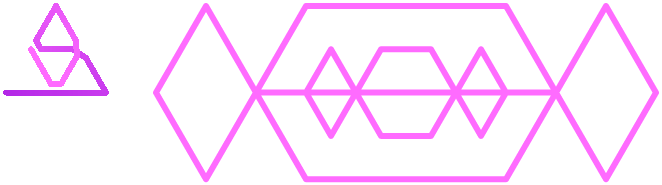

Segment


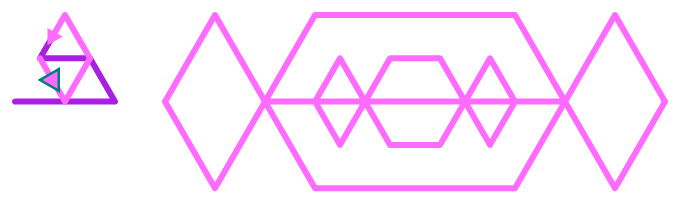

Monocolor


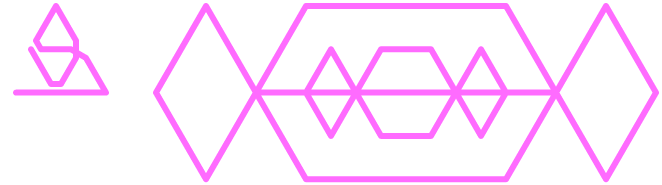

In [5]:
from hex_renderer_py import Triangle, CollisionOption, Color, Marker

segment = gradient.with_pattern_options(
    gradient.pattern_options.with_lines(
        Lines.SegmentColors(
            colors=palettes["default"],
            triangles=Triangle.BorderStartMatch(
                match_radius=0.2,
                border=Marker(
                    color=Color(0, 125, 125,255),
                    radius=0.3
                )
            ),
            collisions=CollisionOption.ParallelLines()
        )
    )
)

monocolor = gradient.with_pattern_options(
    gradient.pattern_options.with_lines(
        Lines.Monocolor(
            color=palettes["default"][0],
            bent=True
        )
    )
)

patterns = [
    PatternVariant("SOUTH_EAST", "aqaaedw"),
    PatternVariant("NORTH_WEST", "wawqwawwwewwwewwwawqwawwwewwwewdeaweewaqaweewaawwww", True)
]

grid = HexGrid(patterns, 50)

print("Gradient")
display(Image(data=bytes(grid.draw_png(50, gradient))))

print("Segment")
display(Image(data=bytes(grid.draw_png(50, segment))))

print("Monocolor")
display(Image(data=bytes(grid.draw_png(50, monocolor))))